Plot vertical structure MMT.

In [1]:
import numpy as np
import xarray as xr
import cmocean as cmocean
import numpy.linalg as la
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import LogFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
# Snapshot
root = '/scratch/mp6191/NW2_TracerBackscatter'
name = '__xarray_dataarray_variable__'

exp = '/p5_noBS_KHTR0_2'
p5_noBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1#.load()
p5_noBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2#.load()
#p5_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name]#.load()
#p5_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p5_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p5_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p5_eta = xr.open_dataset(root + exp + '/MOM_IC.nc', decode_times = False).eta.isel(Time = -1)

exp = '/p5_SQGBS_KHTR0_2'
p5_SQGBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1#.load()
p5_SQGBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2#.load()
#p5_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)['kappa1']#.load()
#p5_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)['kappa2']#.load()
p5_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()

exp = '/p25_noBS_2'
p25_noBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1#.load()
p25_noBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2#.load()
#p25_noBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa1_err.nc', decode_times = False)[name]#.load()
#p25_noBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p25_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p25_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p25_eta = xr.open_dataset(root + '/p25_SpinUp' + '/MOM_IC.nc', decode_times = False).eta.isel(Time = -1)

exp = '/p25_SQGBS_2'
p25_SQGBS_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1#.load()
p25_SQGBS_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2#.load()
#p25_SQGBS_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
#p25_SQGBS_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p25_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()

exp = '/p03125_2'
p03125_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1#.load()
p03125_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2#.load()
#p03125_kappa1_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
#p03125_kappa2_err = xr.open_dataset(root + exp + '/MMT_kappa2_err.nc', decode_times = False)[name]#.load()
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
p03125_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p03125_eta = xr.open_dataset('/scratch/mp6191/NW2_TracerBackscatter/p03125_IC/MOM_IC_4.nc', decode_times = False).eta.isel(Time = -1)

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [3]:
def get_colors_from_cmap(cmap_name, n_colors):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

blues   = get_colors_from_cmap('Blues', 10)
reds = ['#f69a8b', '#b91a38']
greys = get_colors_from_cmap('Greys', 10)

colorlist_p5 = [blues[4], reds[0]]
colorlist_p25 = [blues[8], reds[1]]
colorlist_p03125 = [greys[3], greys[5], 'k']

/state/partition1/job-65483233/ipykernel_2244176/3569882092.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


In [4]:
def SubTrop_slice(ds):

    xh_min = 46
    yh_min = -22

    return ds.sel(xh = slice(xh_min, xh_min + 6), yh = slice(yh_min, yh_min + 6))  

def SubPol_slice(ds):

    xh_min = 46
    yh_min = 52
    
    return ds.sel(xh = slice(xh_min, xh_min + 6), yh = slice(yh_min, yh_min + 6))
    
def ACC_slice(ds):

    xh_min = 46
    yh_min = -54

    return ds.sel(xh = slice(xh_min, xh_min + 6), yh = slice(yh_min, yh_min + 6))

def plotting_h(h, eta, static, slice_func, res):
    eta = (0 * eta.rename({'Interface' : 'zi', 'lath' : 'yh', 'lonh' : 'xh'})).load().fillna(0.)
    D = static.depth_ocean.load()
    for i in range(eta.zi.size):
        eta[i, :, :] = (-D + np.nansum(h[i : , :, :], axis = 0))
    eta_c = 0.5 * (eta.values[1:, :, :] + eta.values[:-1, :, :]) + 0 * h
    return slice_func(eta_c)

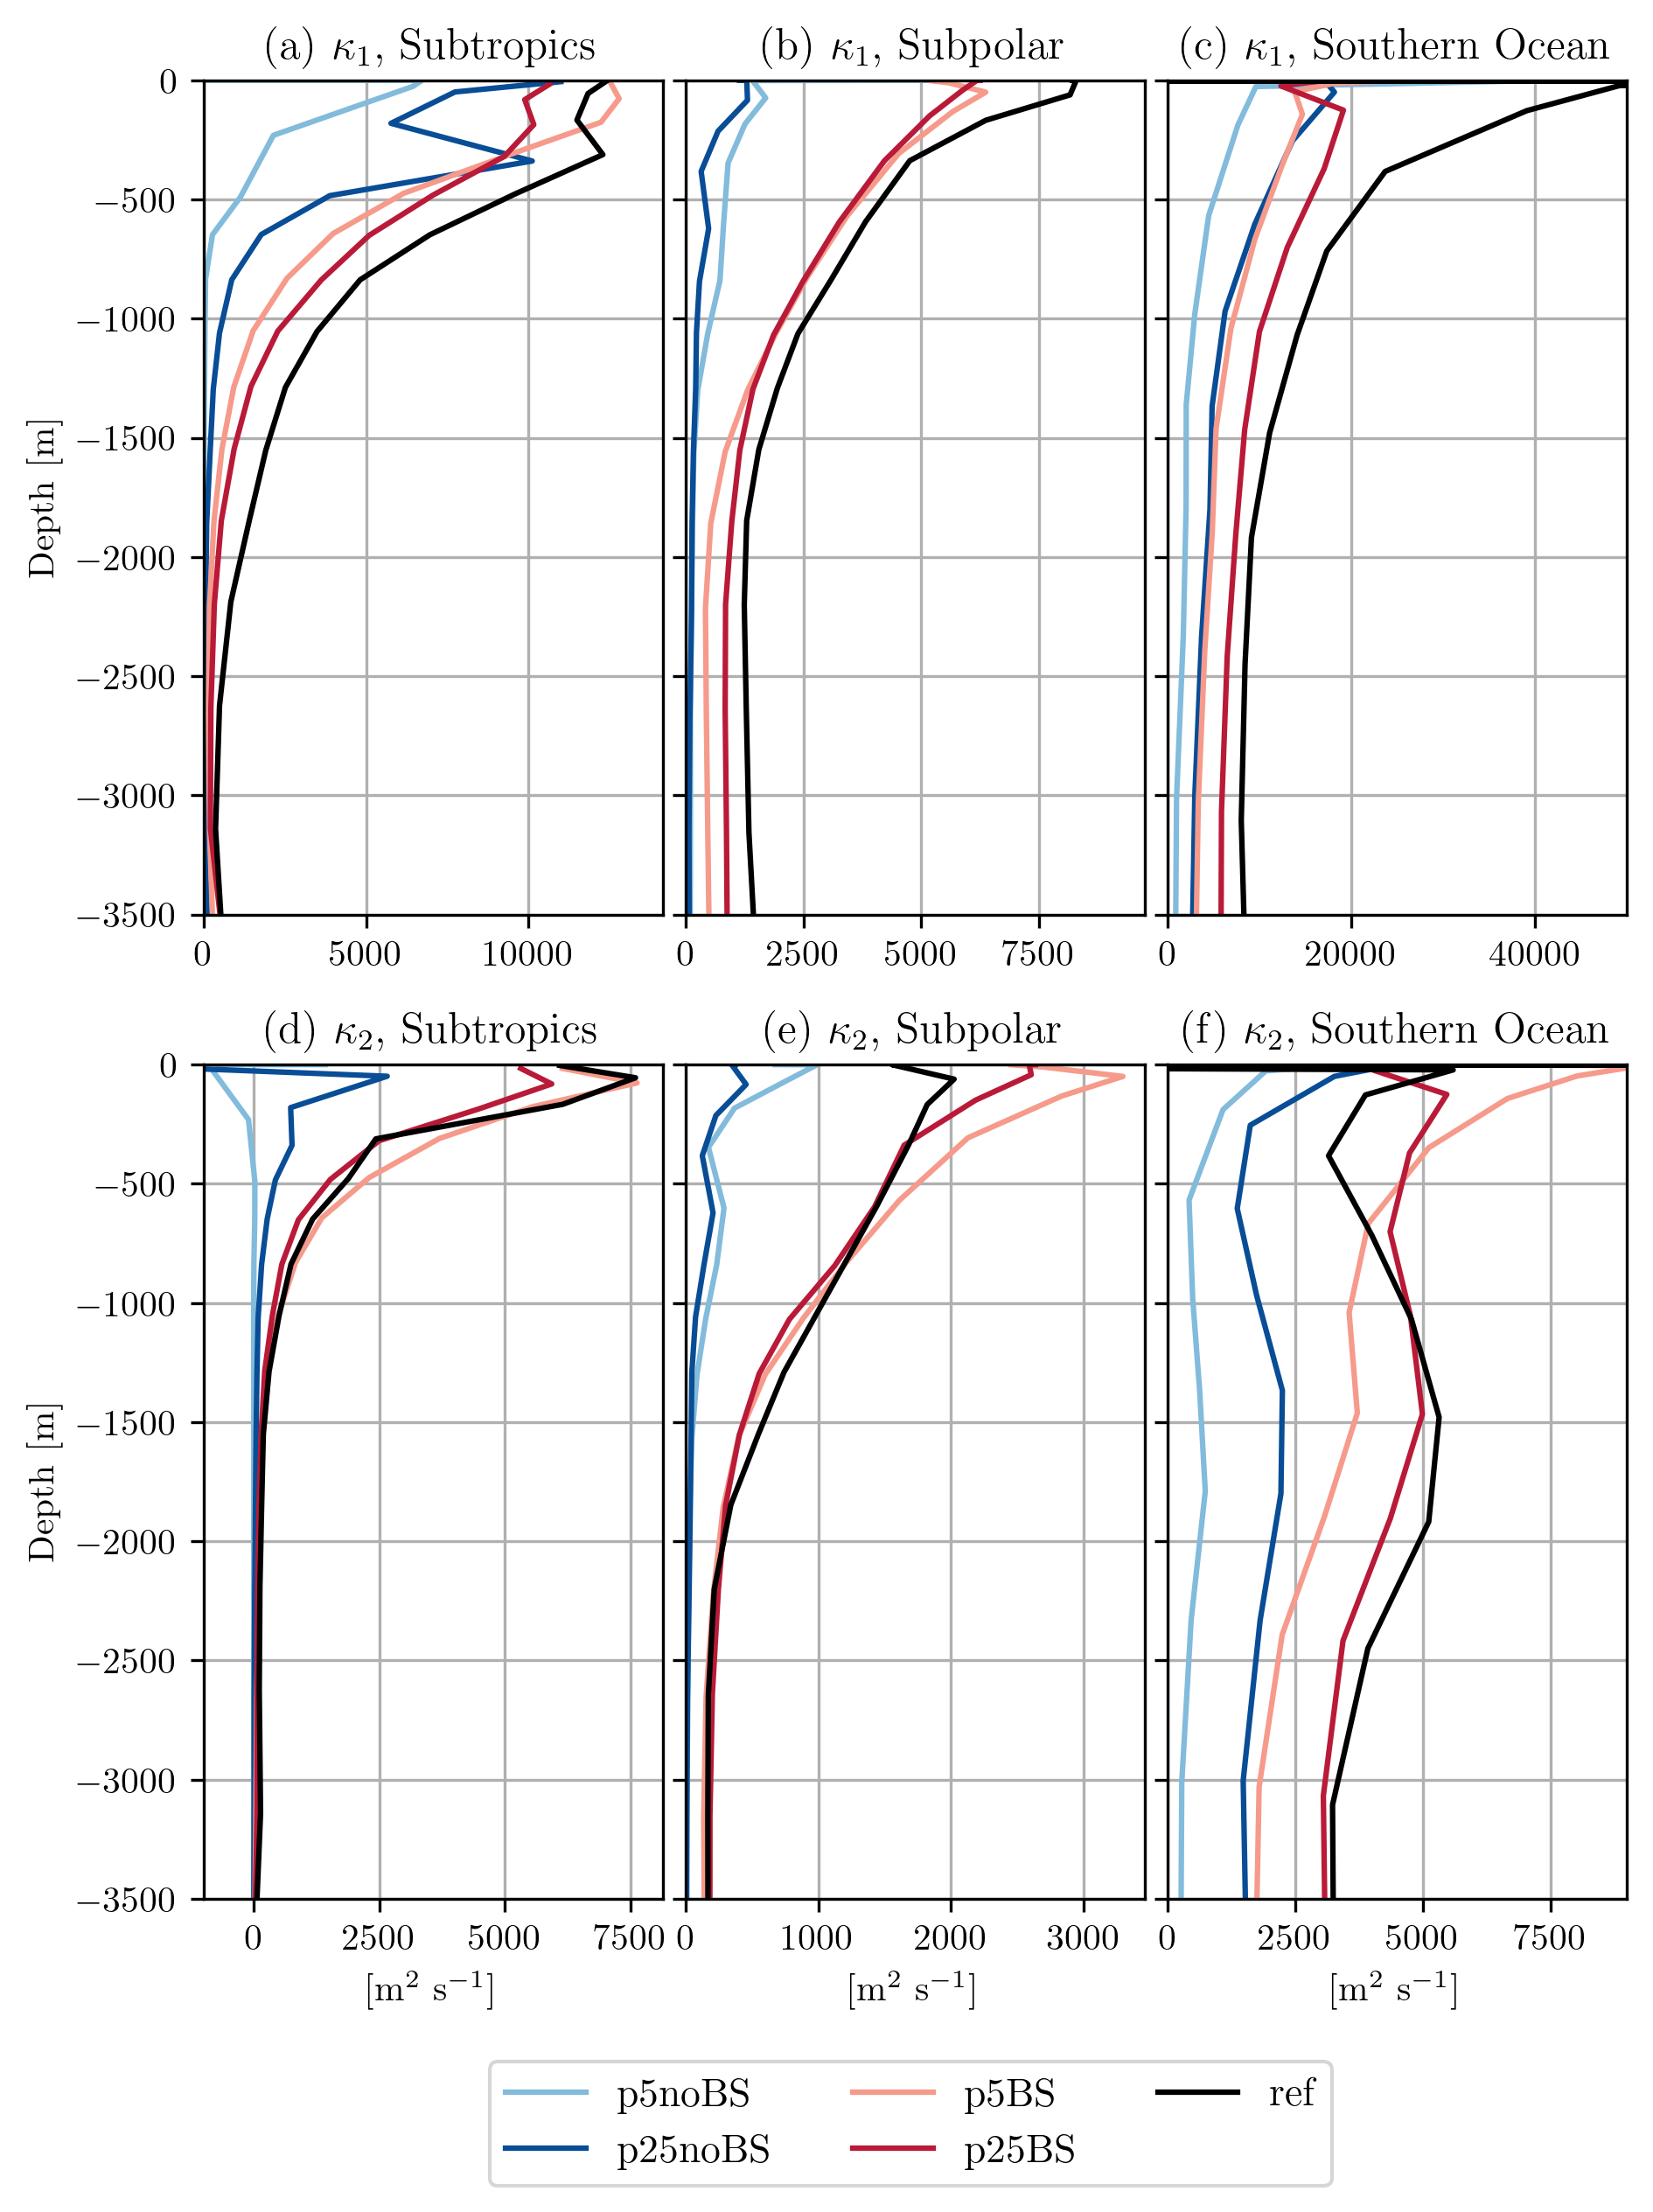

In [6]:
fig, axs = plt.subplots(figsize = (7, 9), nrows = 2, ncols = 3, dpi = 300, facecolor = 'w', edgecolor = 'k')
fontsize = 13
linewidth = 1.5
ymin = -3500

# kappa1
ax = axs[0, 0]
slice_func = SubTrop_slice

kappa = slice_func(p5_noBS_kappa1)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa1)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa1)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa1)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], linewidth = linewidth)

kappa = slice_func(p03125_kappa1)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], linewidth = linewidth)

ax.grid()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('')
ax.set_title('(a) $\kappa_1$, Subtropics')
ax.set_ylim([ymin, 0])
ax.set_xlim([0, None])

ax = axs[0, 1]
slice_func = SubPol_slice

kappa = slice_func(p5_noBS_kappa1)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa1)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa1)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa1)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], linewidth = linewidth)

kappa = slice_func(p03125_kappa1)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], linewidth = linewidth)

ax.grid()
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('(b) $\kappa_1$, Subpolar')
ax.set_ylim([ymin, 0])
ax.set_xlim([0, 9750])
ax.tick_params(labelleft = False)

ax = axs[0, 2]
slice_func = ACC_slice

kappa = slice_func(p5_noBS_kappa1)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa1)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa1)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa1)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], linewidth = linewidth)

kappa = slice_func(p03125_kappa1)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], linewidth = linewidth)

ax.grid()
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('(c) $\kappa_1$, Southern Ocean')
ax.set_ylim([ymin, 0])
ax.set_xlim([0, 50000]) # 24950])
ax.tick_params(labelleft = False)

# kappa2
ax = axs[1, 0]
slice_func = SubTrop_slice

kappa = slice_func(p5_noBS_kappa2)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa2)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa2)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa2)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], linewidth = linewidth)

kappa = slice_func(p03125_kappa2)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], linewidth = linewidth)

ax.grid()
ax.set_ylabel('Depth [m]')
ax.set_xlabel('[m$^2$ s$^{-1}$]')
ax.set_title('(d) $\kappa_2$, Subtropics')
ax.set_ylim([ymin, 0])
ax.set_xlim([-1000, None])

ax = axs[1, 1]
slice_func = SubPol_slice

kappa = slice_func(p5_noBS_kappa2)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa2)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa2)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa2)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], linewidth = linewidth)

kappa = slice_func(p03125_kappa2)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], linewidth = linewidth)

ax.grid()
ax.set_ylabel('')
ax.set_xlabel('[m$^2$ s$^{-1}$]')
ax.set_title('(e) $\kappa_2$, Subpolar')
ax.set_ylim([ymin, 0])
ax.set_xlim([0, None])
ax.tick_params(labelleft = False)

ax = axs[1, 2]
slice_func = ACC_slice

kappa = slice_func(p5_noBS_kappa2)
res = 0.5
z = plotting_h(p5_noBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[0], label = 'p5noBS', linewidth = linewidth)

kappa = slice_func(p25_noBS_kappa2)
res = 0.25
z = plotting_h(p25_noBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_noBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[0], label = 'p25noBS', linewidth = linewidth)

kappa = slice_func(p5_SQGBS_kappa2)
res = 0.5
z = plotting_h(p5_SQGBS_h, p5_eta, p5_static, slice_func, res)
h = slice_func(p5_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p5[1], label = 'p5BS', linewidth = linewidth)

kappa = slice_func(p25_SQGBS_kappa2)
res = 0.25
z = plotting_h(p25_SQGBS_h, p25_eta, p25_static, slice_func, res)
h = slice_func(p25_SQGBS_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p25[1], label = 'p25BS', linewidth = linewidth)

kappa = slice_func(p03125_kappa2)
res = 0.03125
z = plotting_h(p03125_h, p03125_eta, p03125_static, slice_func, res)
h = slice_func(p03125_h).coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
ax.plot((kappa * h).sum(['xh', 'yh']) / h.sum(['xh', 'yh']), z.mean(['xh', 'yh']), color = colorlist_p03125[2], label = 'ref', linewidth = linewidth)

ax.grid()
ax.set_ylabel('')
ax.set_xlabel('[m$^2$ s$^{-1}$]')
ax.set_title('(f) $\kappa_2$, Southern Ocean')
ax.set_ylim([ymin, 0])
ax.set_xlim([0, 9000])
ax.tick_params(labelleft = False)

# Legend
fig.legend(fontsize = fontsize - 2, loc = 'lower center', ncol = 3, bbox_to_anchor = (0.51, -0.02))

plt.subplots_adjust(wspace = 0.05, hspace = 0.18)
#plt.savefig('Fig_vertical_structure_MMT.pdf', bbox_inches = 'tight', dpi = 300)